In [35]:
# importing required libraries;
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(451, 3)


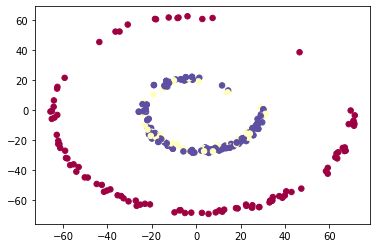

In [36]:
# reading data from csv and extracting data points belonging to each class and restructuring 
# and using first 100 points from each class as train and rest 50 each class as test;

data=np.genfromtxt("traingroup11.csv",delimiter=',',skip_header=1)
print(data.shape)
c0=data[data[:,2]==0.0]
c1=data[data[:,2]==1.0]
c2=data[data[:,2]==2.0]
data1=np.zeros((0,3))
for i in range(451):
    if i%3==0:
        data1=np.append(data1,c0[int(i/3)].reshape(1,3),axis=0)
    elif i&3==1:
        data1=np.append(data1,c1[int(i/3)].reshape(1,3),axis=0)
    else:
        data1=np.append(data1,c2[int(i/3)].reshape(1,3),axis=0)
test=data1[301:,:]
train=data1[0:300,:]
X_train = train[:, :2]
Y_train = train[:, 2]
X_train1=X_train
Y_train1=Y_train
expected_out=Y_train


plt.scatter(X_train1[:,0],X_train1[:,1], c=Y_train1, s=30, cmap=plt.cm.Spectral);

l1_nodes=7
l2_nodes=5

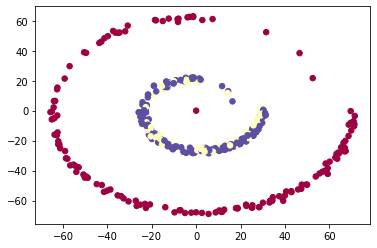

In [37]:
plt.scatter(data1[:,0],data1[:,1], c=data1[:,2], s=30, cmap=plt.cm.Spectral);

In [40]:
X_val = test[:, :2]
Y_val = test[:, 2]
expected_out1=Y_val

X_train=X_train.T
Y_train=Y_train.T
Y_train.shape
a=Y_train

Y_train=Y_train.astype(int)

#converting Y_train to different usable form;

temp = np.zeros((Y_train.size, Y_train.max()+1))
temp[np.arange(Y_train.size),Y_train] = 1
Y_train=temp

In [41]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [42]:
# neural network model function
def mlffnn(X, Y,  num_iterations ,print_cost=False,learning_rate = 0.01,beta = 0.9):
    req_wts=[]                   
     
    #initializing weights;
    
    W1 = np.random.randn(l1_nodes,2) * np.sqrt(2/l1_nodes)
    b1 = np.zeros(shape=(l1_nodes, 1))
    W2 = np.random.randn(l2_nodes, l1_nodes) * np.sqrt(2/l2_nodes)
    b2 = np.zeros(shape=(l2_nodes, 1))
    W3 = np.random.randn(3, l2_nodes) * np.sqrt(2/3)
    b3 = np.zeros(shape=(3, 1))
    
    
    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2= np.zeros_like(b2)
    vW3 = np.zeros_like(W3)
    vb3= np.zeros_like(b3)
    
    
    costs=[]
    for i in range(0, num_iterations):  
        
    #farward propagation steps, parameter calculation;
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = np.tanh(Z2)

        Z3 = np.dot(W3, A2) + b3
        A3 = sigmoid(Z3)
        
        
        m=300
        
        #calculating cost;
        cost = cost = (-1/m)*np.sum(np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1 - A3)))
        if i % 100 == 0:
            costs.append(cost)

        # Backpropagation steps, parameter calculation;
        dZ3 = A3 - Y
        dW3 = (1 / m) * np.dot(dZ3, A2.T)
        db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
        dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        # parameter updating using generalised delta method;
        vW1 = beta * vW1 + (1 - beta) * dW1
        vb1 = beta * vb1 + (1 - beta) * db1
        vW2 = beta * vW2 + (1 - beta) * dW2
        vb2 = beta * vb2 + (1 - beta) * db2
        vW3 = beta * vW3 + (1 - beta) * dW3
        vb3 = beta * vb3 + (1 - beta) * db3
 
        W1 = W1 - learning_rate * vW1
        b1 = b1 - learning_rate * vb1
        W2 = W2 - learning_rate * vW2
        b2 = b2 - learning_rate * vb2
        W3 = W3 - learning_rate * vW3
        b3 = b3 - learning_rate * vb3
        
        
        if(print_cost and i%1000==0):
            print("cost ",cost)
            
        weights = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
                 }
        if (i==1 or i==2 or i==10 or i==50 or i==60000-1):
            req_wts+=[weights]
    return weights,costs,req_wts

In [43]:
weights,costs,req_wts = mlffnn(X_train, Y_train.T,  num_iterations = 60000, print_cost=True)

cost  2.1171040425650745
cost  1.6103003420959938
cost  1.4710438824087424
cost  1.0007458801532907
cost  0.8912715482104402
cost  0.8529097217906887
cost  0.8303316467381469
cost  0.8144869452813709
cost  0.7999720322705725
cost  0.7846515737287657
cost  0.773837802501699
cost  0.7649013112887544
cost  0.7562955907407718
cost  0.7469888994900782
cost  0.7391750174024962
cost  0.734187637857276
cost  0.7305418818040654
cost  0.727631036038262
cost  0.7252415466680519
cost  0.7231892433077491
cost  0.7213613026683257
cost  0.7196937231613584
cost  0.7181493498943725
cost  0.7167060471890463
cost  0.7153501268066081
cost  0.7140724384692142
cost  0.7128660621932497
cost  0.7117250658598274
cost  0.7106439255352303
cost  0.7096173024263553
cost  0.7086399877927814
cost  0.7077069215854899
cost  0.706813241660114
cost  0.705954340739794
cost  0.7051259165121244
cost  0.7043240064719999
cost  0.703545005241131
cost  0.7027856667712858
cost  0.7020430960999064
cost  0.7013147354332518
cost  

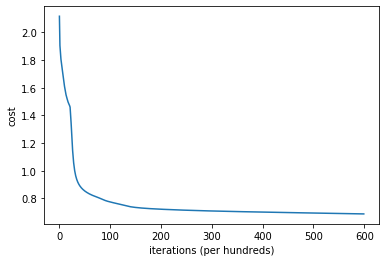

In [44]:
# plot of epochs vs cost;
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.show()

In [45]:
def predict(weights, X):  

    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
    W3 = weights['W3']
    b3 = weights['b3']
   
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    predictions = np.argmax(A3,axis=0)
    
    return predictions

In [46]:
pred=predict(weights, X_train)
count=0
count1=0
pred1=predict(weights,X_val.T)
i=0
j=0
while i<300:
    if(pred[i]==expected_out[i]):
        count=count+1
    i=i+1
while j<150:
    if(pred1[j]==expected_out1[j]):
        count1=count1+1
    j=j+1
print("train accuracy =",count/301)
print("test accuracy =",count1/150)

train accuracy = 0.840531561461794
test accuracy = 0.76


In [47]:
# ploting decision boundary overlaped with train data;
def plot_decision_boundary(weights, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = (np.c_[xx.ravel(), yy.ravel()])
    Z = (np.c_[xx.ravel(), yy.ravel()])
    pred=predict(weights, Z.T)
    pred=pred.reshape(xx.shape)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(xx, yy, c=pred, cmap=plt.cm.Spectral)
    plt.scatter(c0[0:105,0],c0[0:105,1] , s=30)
    plt.scatter(c1[0:105,0],c1[0:105,1] , s=30)
    plt.scatter(c2[0:105,0],c2[0:105,1] , s=30)
    plt.title("Decision Region with train-data points for 2d-data")
plot_decision_boundary(weights, X_train)   



In [48]:
# ploting decision boundary overlaped with test data;
def plot_decision_boundary(weights, X):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.1
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = (np.c_[xx.ravel(), yy.ravel()])
    Z = (np.c_[xx.ravel(), yy.ravel()])
    pred=predict(weights, Z.T)
    pred=pred.reshape(xx.shape)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(xx, yy, c=pred, cmap=plt.cm.Spectral)
    plt.scatter(c0[105:,0],c0[105:,1] , s=30)
    plt.scatter(c1[105:,0],c1[105:,1] , s=30)
    plt.scatter(c2[105:,0],c2[105:,1] , s=30)
    plt.title("Decision Region with test-data points for 2d-data")
plot_decision_boundary(weights, X_train)




In [26]:
# functions for plotting node output of each layer;
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def last_layer(j,wts,epoch):
    
    W1 = wts['W1']
    b1 = wts['b1']
    W2 = wts['W2']
    b2 = wts['b2']
    W3 = wts['W3']
    b3 = wts['b3']
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=sigmoid(np.dot(W3, x2) + b3)
    nu=x3[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu,cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("epochs-"+epoch+" outputlayer, node-"+str(j+1))
    plt.show()
#     plt.savefig("epochs-"+epoch+" outputlayer-node-"+str(j+1)+".jpg")
def first_layer(j,wts,epoch):
    
    W1 = wts['W1']
    b1 = wts['b1']
    W2 = wts['W2']
    b2 = wts['b2']
    W3 = wts['W3']
    b3 = wts['b3']
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    nu=x1[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu,cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("epochs-"+epoch+" hiddenlayer-1, node-"+str(j+1))
    plt.show()
#     plt.savefig("epochs-"+epoch+" hiddenlayer1-node-"+str(j+1)+".jpg")
def second_layer(j,wts,epoch):
    
    W1 = wts['W1']
    b1 = wts['b1']
    W2 = wts['W2']
    b2 = wts['b2']
    W3 = wts['W3']
    b3 = wts['b3']
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    nu=x2[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu,cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title("epochs-"+epoch+" hiddenlayer-2, node-"+str(j+1))
    plt.show()
#     plt.savefig("epochs-"+epoch+" hiddenlayer2-node-"+str(j+1)+".jpg")




In [27]:
def print_every_layer_node_outputs(p,i,e):
    
    print("first layer 8 nodes-",e)
    print (" iterations")
    first_layer(0,p,e)
    first_layer(1,p,e)
    first_layer(2,p,e)
    first_layer(3,p,e)
    first_layer(4,p,e)
    first_layer(5,p,e)
    first_layer(6,p,e)
#     first_layer(7,p)
    print("second layer 5 nodes-",e)
    second_layer(0,p,e)
    second_layer(1,p,e)
    second_layer(2,p,e)
    second_layer(3,p,e)
    second_layer(4,p,e)
    print("last layer 3 nodes-",e)
    last_layer(0,p,e)
    last_layer(1,p,e)
    last_layer(2,p,e)

In [28]:


def print_all_required_images():
    for i in range(len(req_wts)): 
        temp=0
        if(i==0):
            temp='1'
        elif(i==1):
            temp='2'
        elif(i==2):
            temp='10'
        elif(i==3):
            temp='50'
        elif(i==4):
            temp='end'
        print_every_layer_node_outputs(req_wts[i],i,temp)

first layer 8 nodes- 1
 iterations


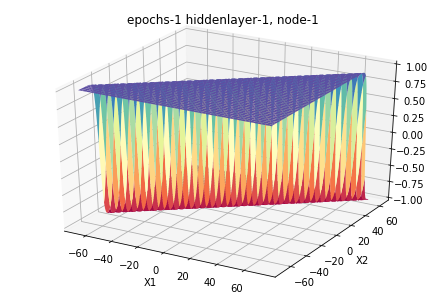

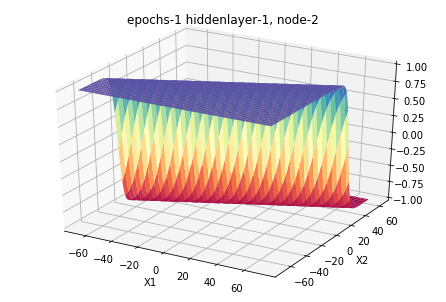

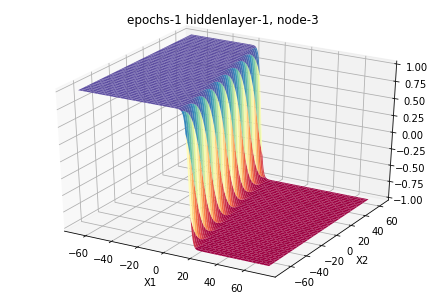

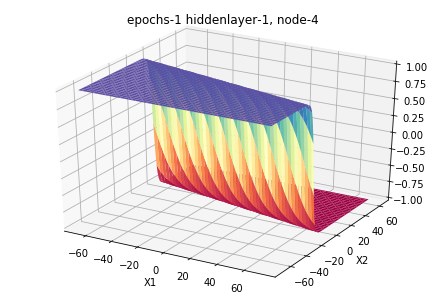

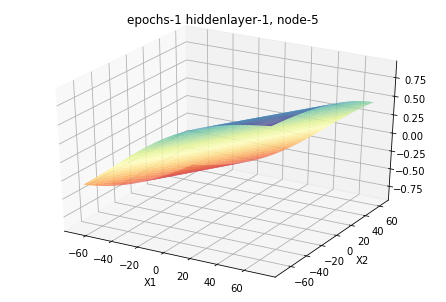

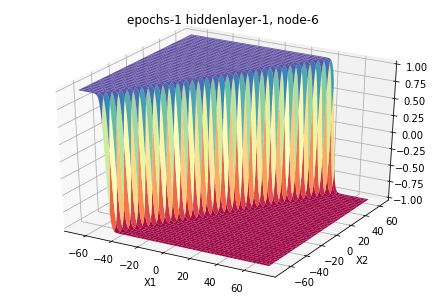

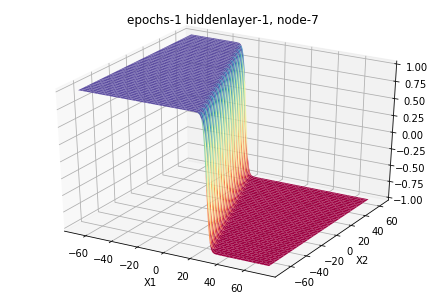

second layer 5 nodes- 1


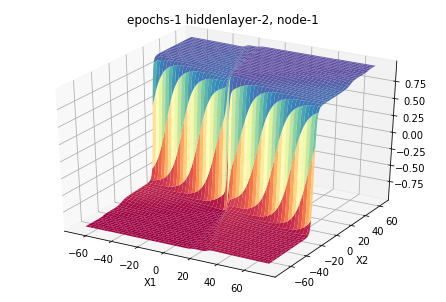

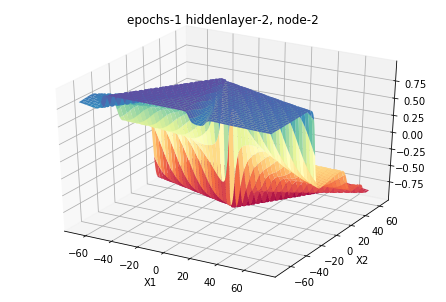

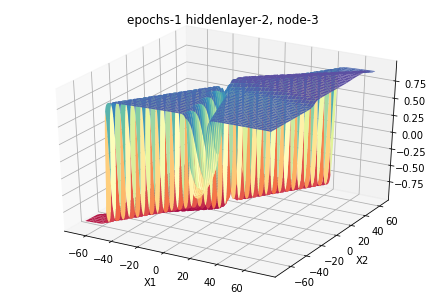

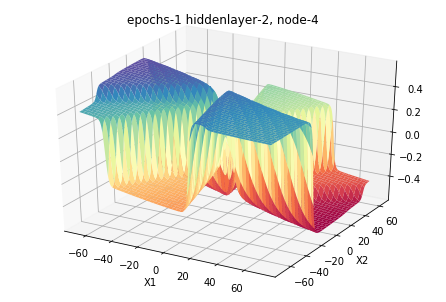

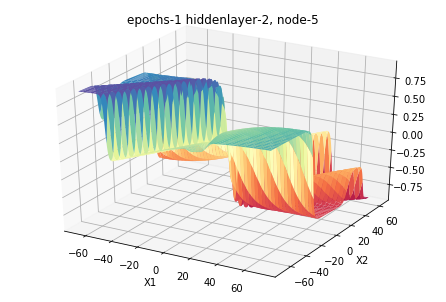

last layer 3 nodes- 1


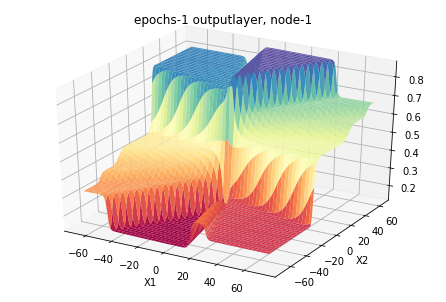

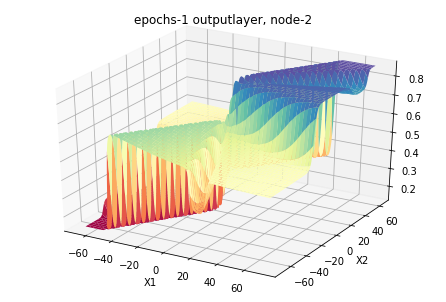

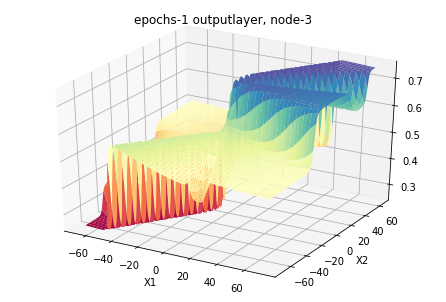

first layer 8 nodes- 2
 iterations


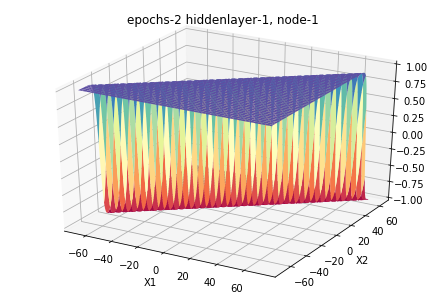

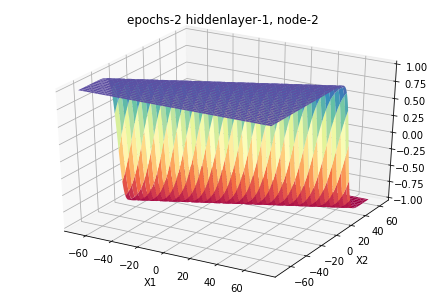

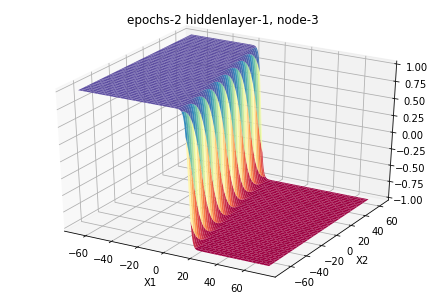

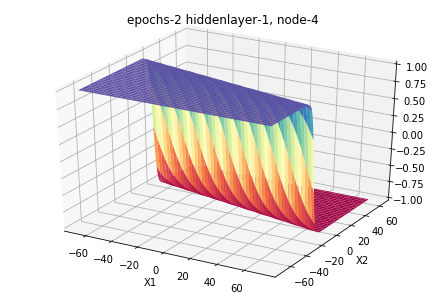

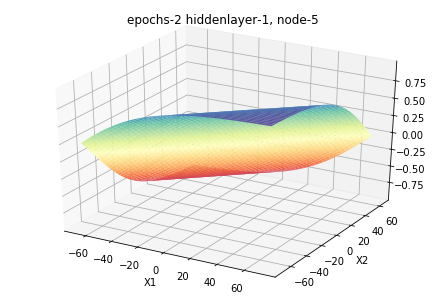

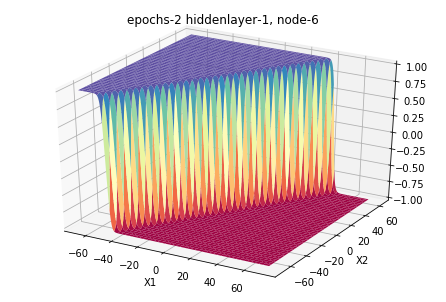

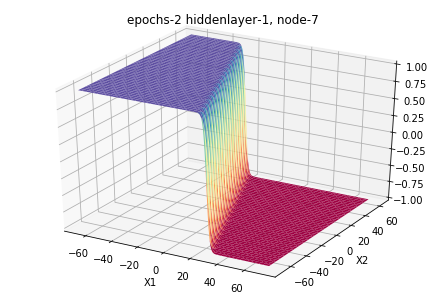

second layer 5 nodes- 2


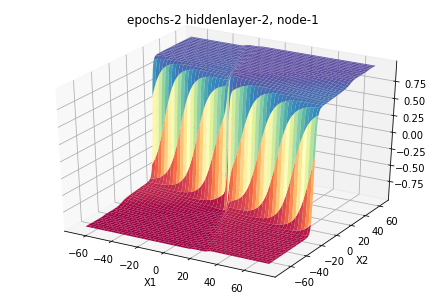

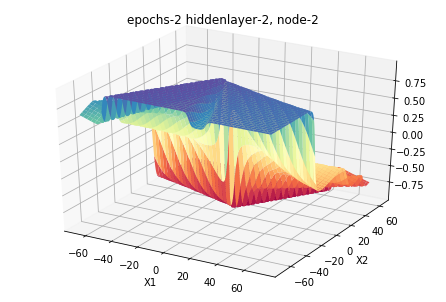

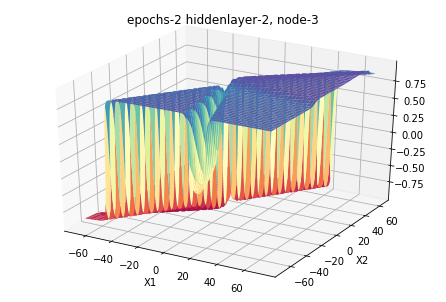

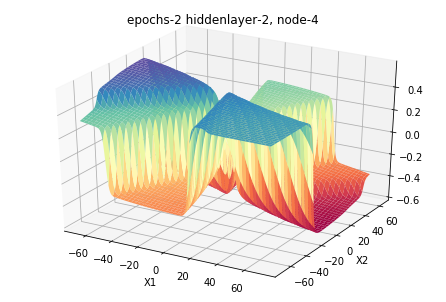

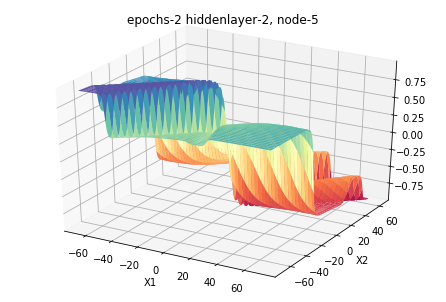

last layer 3 nodes- 2


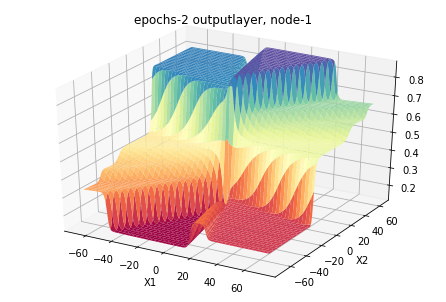

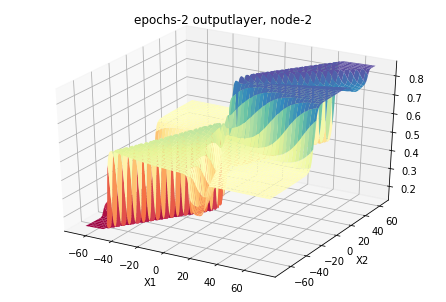

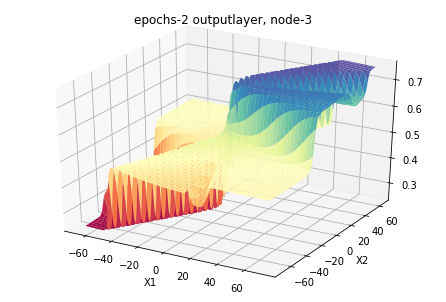

first layer 8 nodes- 10
 iterations


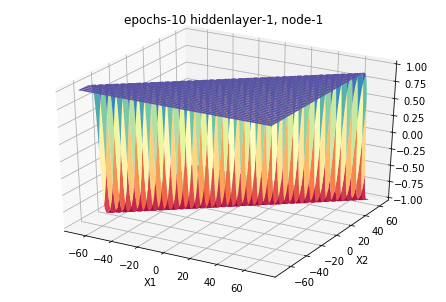

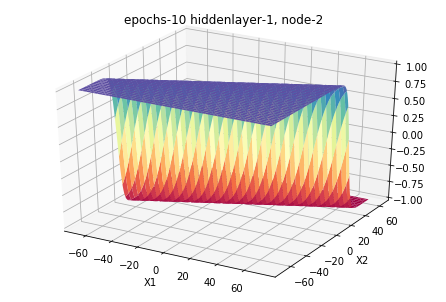

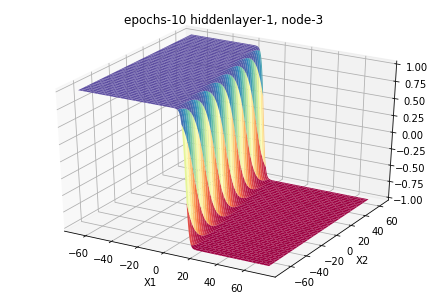

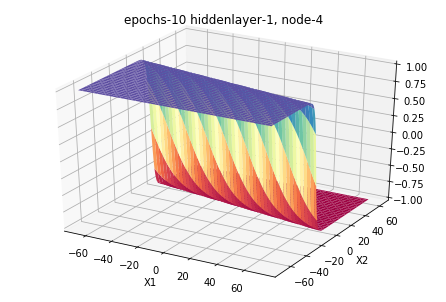

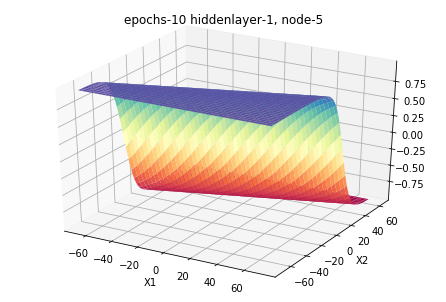

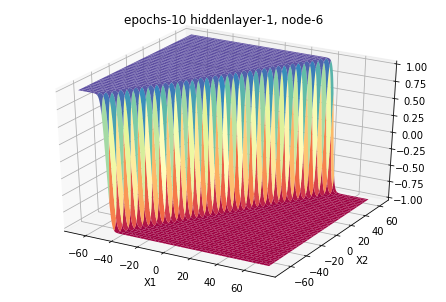

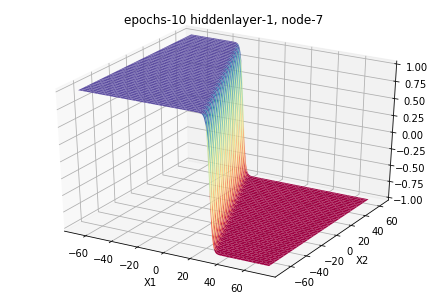

second layer 5 nodes- 10


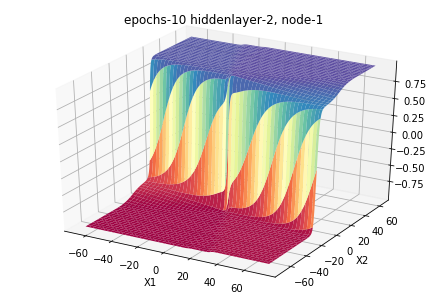

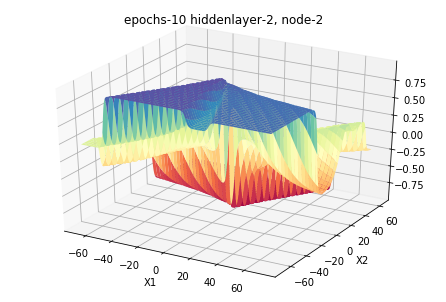

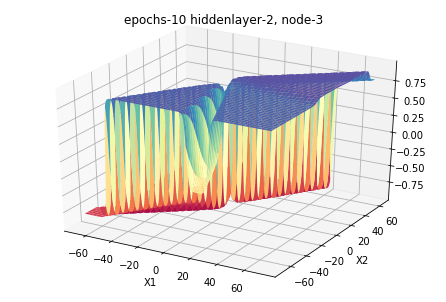

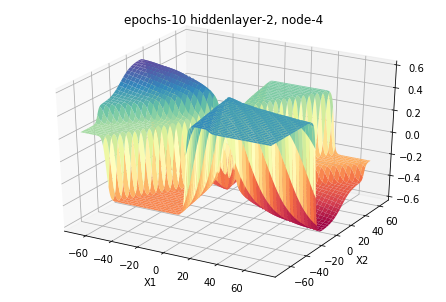

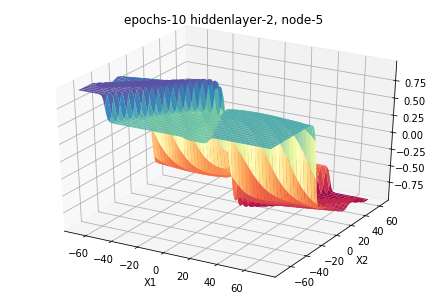

last layer 3 nodes- 10


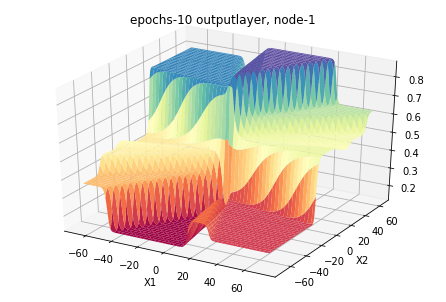

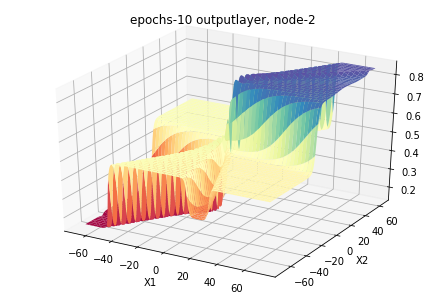

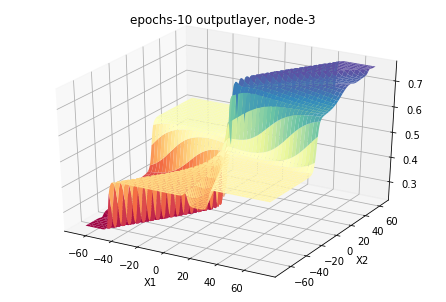

first layer 8 nodes- 50
 iterations


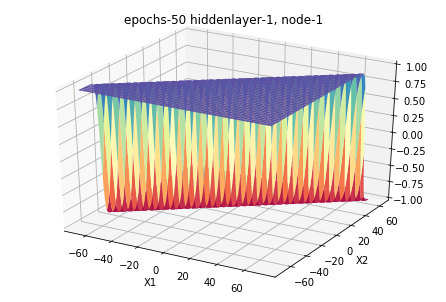

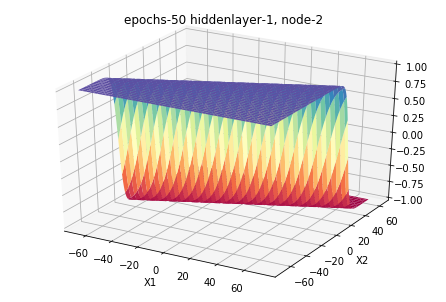

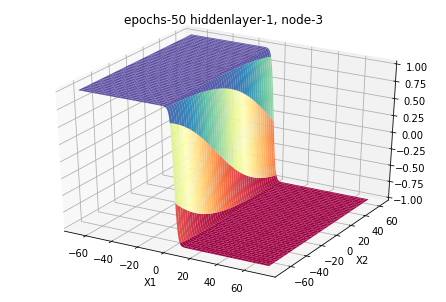

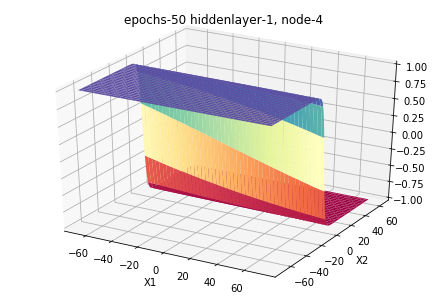

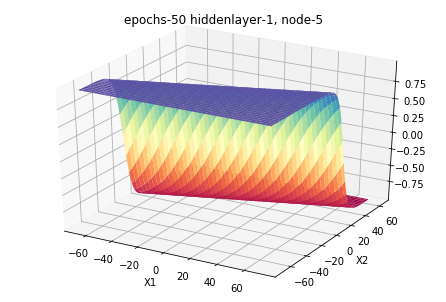

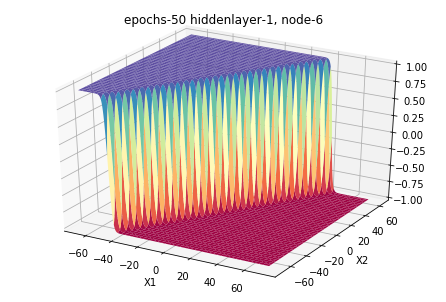

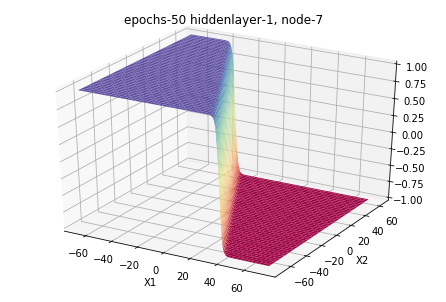

second layer 5 nodes- 50


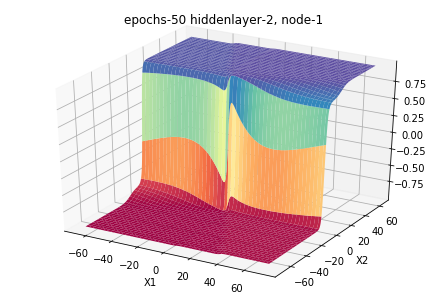

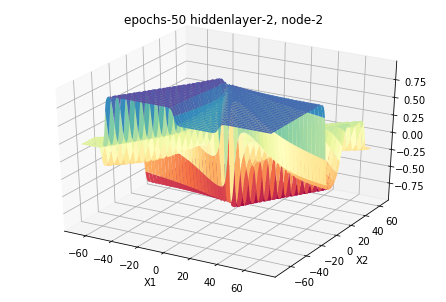

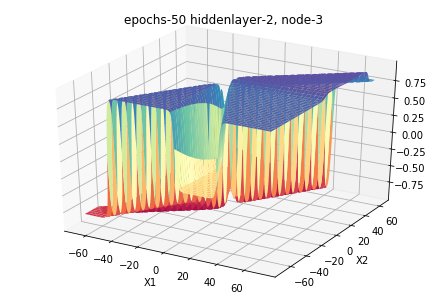

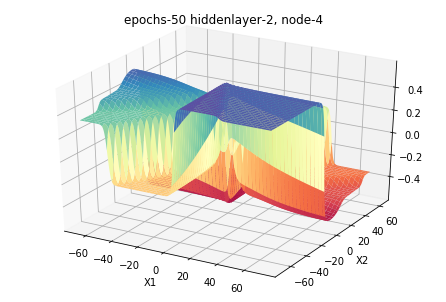

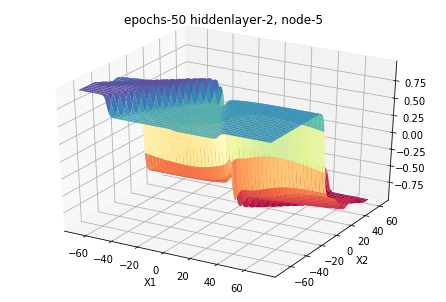

last layer 3 nodes- 50


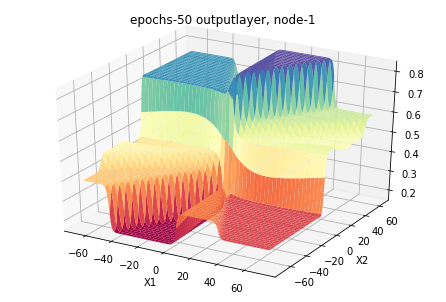

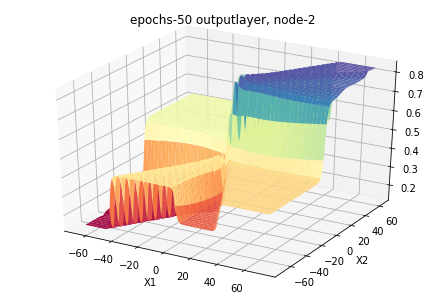

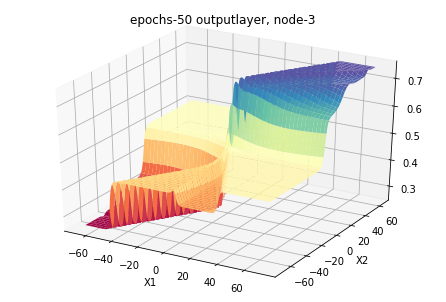

first layer 8 nodes- end
 iterations


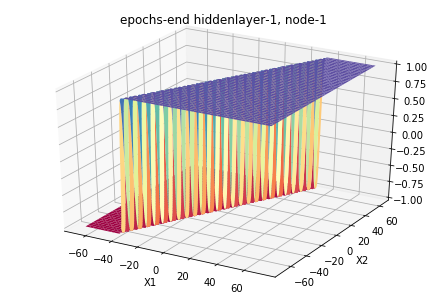

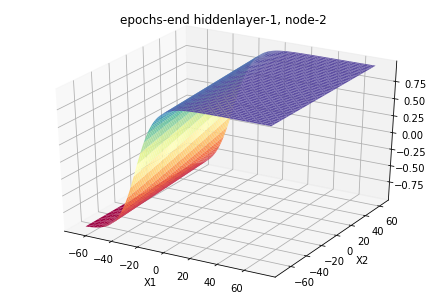

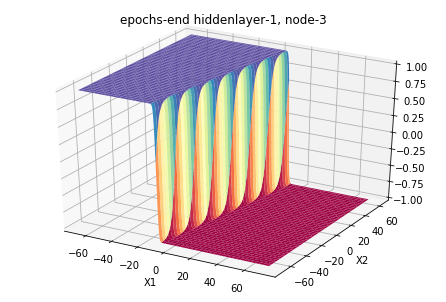

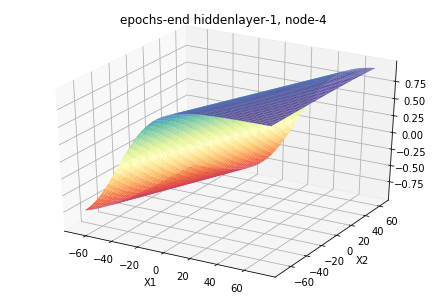

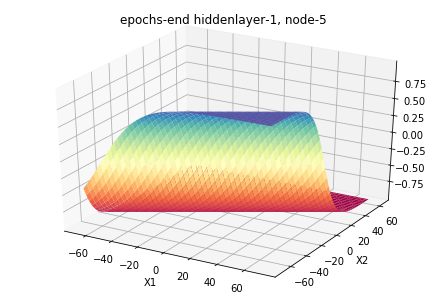

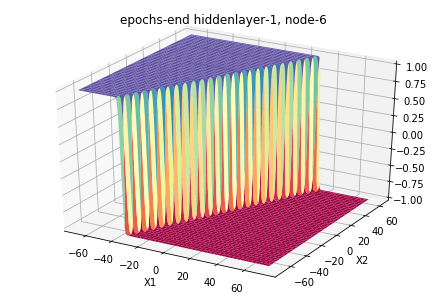

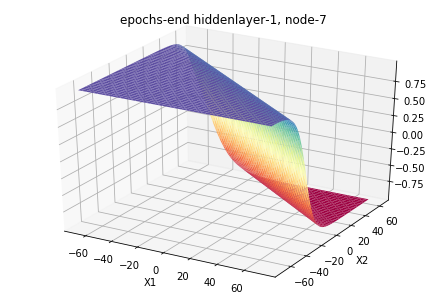

second layer 5 nodes- end


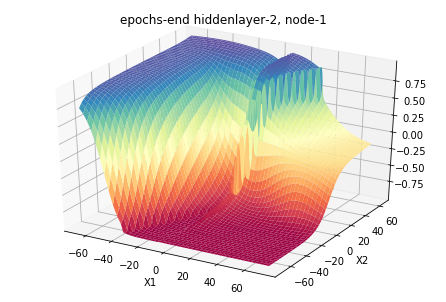

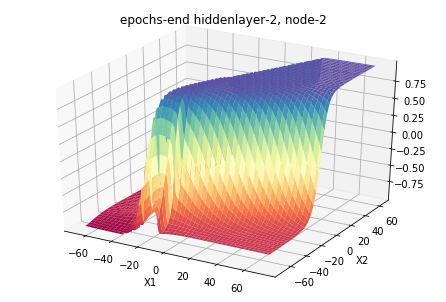

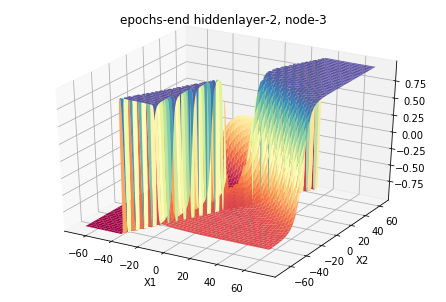

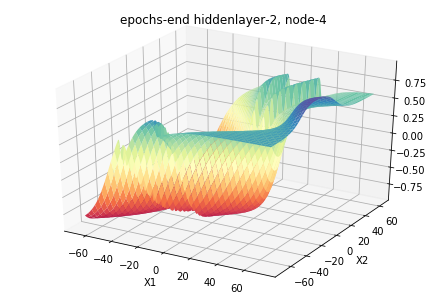

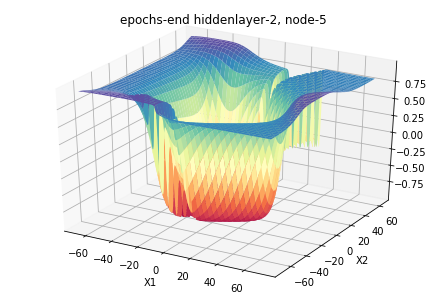

last layer 3 nodes- end


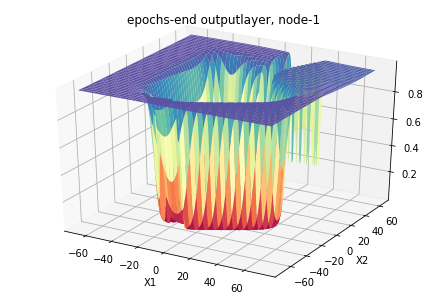

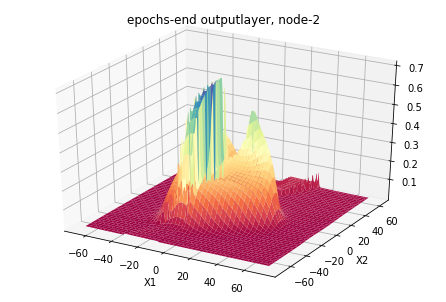

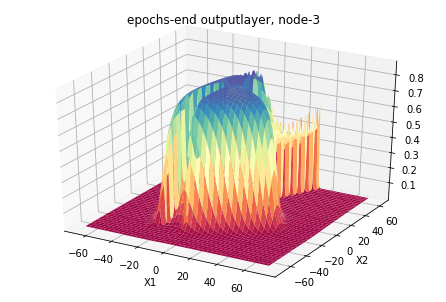

In [29]:


print_all_required_images()